In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer

### Bernstein Vazirani algorithm

In [2]:
secretnumber = '101101'
n = len(secretnumber)

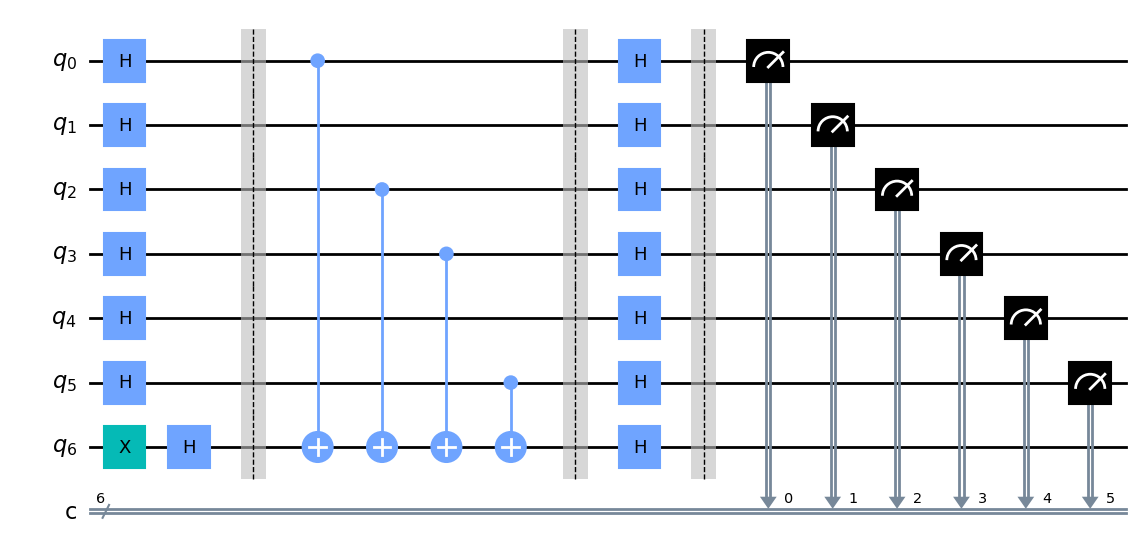

In [3]:
circuit = QuantumCircuit(n+1,n)

circuit.x(n) 
circuit.h(range(n+1)) 
circuit.barrier() 

for ii, flag in enumerate(reversed(secretnumber)):
    if flag == '1': 
        circuit.cx(ii, n)
    
circuit.barrier()

circuit.h(range(n+1)) 
circuit.barrier() 
circuit.measure(range(n), range(n))

circuit.draw(output='mpl')

{'101101': 1}


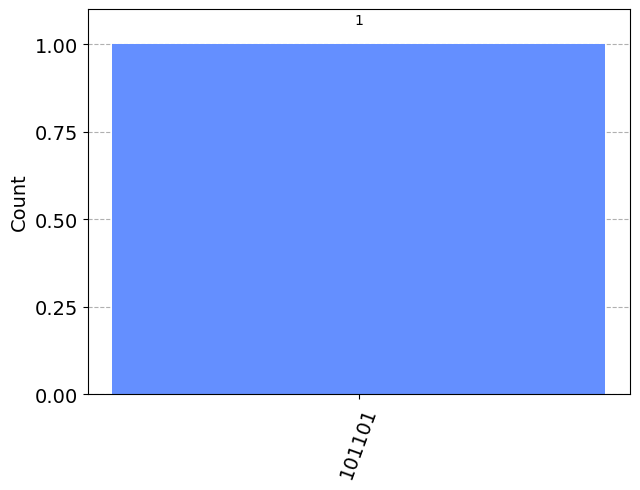

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()  # 1 measurement is enough to obtain secret number in the classical registers
print(result.get_counts())
plot_histogram(result.get_counts(circuit))

# Perfect copy of secretnumber will be obtained below

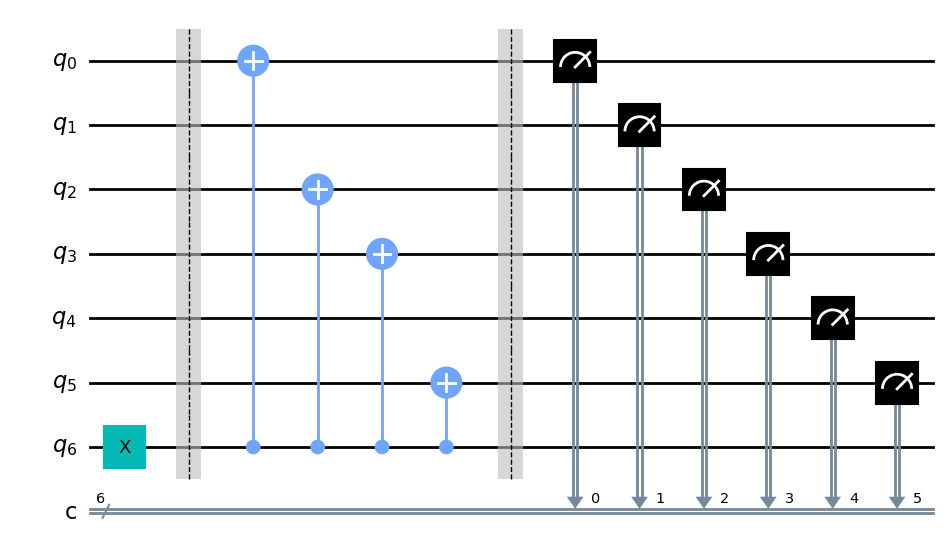

In [5]:
# MERMIN SIMPLIFICATION BASED ON MATRIX ALGEBRA (as found in Peter Young's book - https://young.physics.ucsc.edu/150/phys_150_all.pdf)
# CNOT GATES SANDWICHED BETWEEN HADAMARD TRANSFORMS CAN BE SIMPLIFIED TO INVERTED CNOT GATES WITH THE CONTROL AND TARGET QUBITS EXCHANGED 

circuit = QuantumCircuit(n+1,n)

circuit.x(n) 
circuit.barrier() 

for ii, flag in enumerate(reversed(secretnumber)):
    if flag == '1': 
        circuit.cx(n, ii)
    
circuit.barrier()  
circuit.measure(range(n), range(n))

circuit.draw(output='mpl')


{'101101': 1}


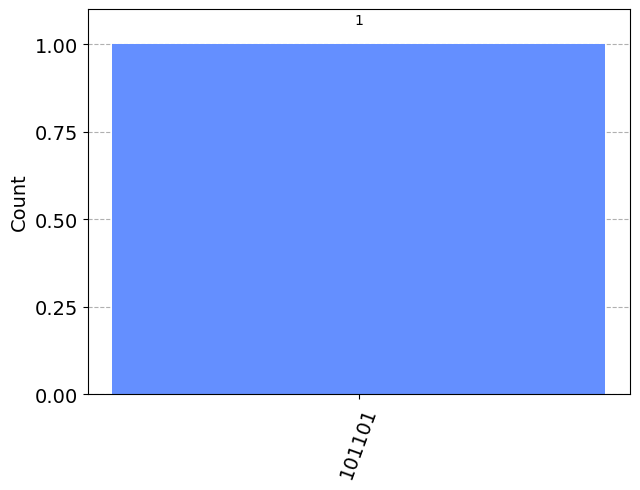

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()  # 1 measurement is enough to obtain secret number in the classical registers
print(result.get_counts())
plot_histogram(result.get_counts(circuit))

CREDITS:
The following repo was a guide to implement general Bernstein Vazirani Algorithm - https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb